In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats, integrate
import warnings
warnings.filterwarnings('ignore')

#### 통계적 가설검정

In [2]:
# [과제] A학생의 사례로 가설검정의 프로세스를 정리하세요.
df= pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])

Q. '감자튀김 무게의 평균이 130g이다.'라는 귀무가설에 대한 유의성 검정을 수행하세요.

In [3]:
# 표본평균
print(sample.mean().round(3))

# 감튀의 모평균 130g, 모분산이 9라고 가정해 보자.
# 감튀 표본 14개의 분포는 N(130,9)의 정규분포를 따른다고 할 수 있다.
# 표본 14개 뽑았으면 n=14이므로 표본평균은 N(130, 9/14)를 따른다.

rv = stats.norm(130,np.sqrt(9/14)) # 표본평균
rv.isf(0.95).round(3) # (임계값)하위 5% 지점의 평균 무게는 128.681g이다.
# 으아니? 내가 얻은 14개 표본의 평균 무게는 128.451g인데 저게 하위 5% 지점보다 작다고?
# 그렇다면 처음부터 감튀 무게의 모평균은 130g보다 작은 게 아닐까?

128.451


128.681

In [4]:
# 검정통계량 z 기준
smean = sample.mean()
z = ((smean-130)/np.sqrt(9/14)).round(3) # 표준화 수행

# 임곗값
rv = stats.norm() # 표준화했기 때문에 표준정규분포로 진행
print(z.round(3), rv.isf(0.95).round(3))

# 검정통계량이 임곗값보다 작으므로 귀무가설 기각

-1.932 -1.645


In [5]:
# 알파(유의수준, 0.05) 기준 / 내가 확인하려는 유의수준은 5%, 즉 0.05
# p값은 유의수준보다 작은, 검정통계량까지 면적 = 곧 확률이다.
# 유의수준 역시 확률이므로 확률은 확률끼리 비교하기
p = rv.cdf(z)
p.round(3)

# p값이 유의수준보다 작으므로 귀무가설 기각

0.027

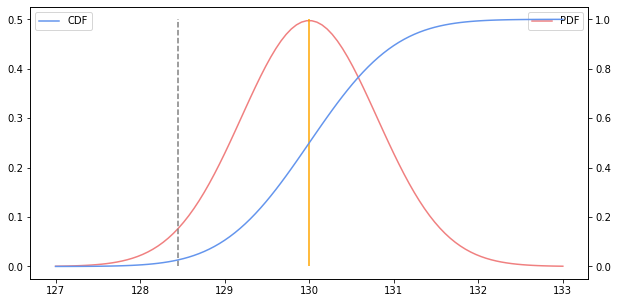

In [6]:
# 그래프 그리기

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

rv = stats.norm(130, np.sqrt(9/14))
xrange = np.linspace(127,133,100)
ax1.plot(xrange, rv.pdf(xrange), color = 'lightcoral', label='PDF')
ax2.plot(xrange, rv.cdf(xrange), color = 'cornflowerblue',label='CDF')
ax1.set_xticks(np.linspace(127,133,7))
ax1.vlines(130, 0,0.5, color='orange')
ax1.vlines(sample.mean(), 0,0.5, color='gray',ls='--')

ax1.legend()
ax2.legend()
plt.show()

In [7]:
# 양측검정

# 귀무가설 - 감튀 평균 무게는 130g이다.
# 대립가설 - 감튀 평균 무게는 130이 아 니 다. (그 전에는 작다 였음)

# 130g이 아닌 경우는 2가지, 크거나 작거나임. 그래서 단측이 아닌 양측검정 해야 함.

z = (smean-130)/np.sqrt(9/14)
z.round(3)

-1.932

In [8]:
rv = stats.norm()
np.round(rv.interval(0.95),3) # 튜플로 반환

array([-1.96,  1.96])

In [9]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로
# 누적 밀도 함수의 2배로 진행한다.
rv.cdf(z) * 2
# 유의수준 α = 0.05를 넘어섰으므로 귀무가설은 채택된다.
# 즉, "감튀 평균 무게는 130g이 아니다" 라고는 말할 수 없는 것.
### 이거 조심해야 함. 감튀 평균 무게 130g이다 라는 결론 아님.

0.05332263904625327

#### 가설검정에서의 두 가지 오류
- 제1종 오류<br>
    귀무가설이 옳을 때, 귀무가설을 기각하는 오류.<br>예) 실제 평균이 130g인데도 '평균은 130g보다 작다'는 결론을 내리는 경우.
- 제2종 오류<br>
    대립가설이 옳을 때, 귀무가설을 채택하는 오류.<br>예) 모평균은 130g보다 적은데도 '평균은 130g보다 작다고 할 수 없다'는 결론을 내리는 경우.<br>즉, 모평균이 130g보다 작다는 결론을 얻을 수 없을 때 제2종 오류가 발생한다.
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만,<br>제2종 오류는 제어할 수 없는 비대칭성이 있다.
<br>

#### 오탐(false positive)
    검출하지 말아야 할 것을 검출한 것.
    감튀 무게 평균은 130g인데 평균이 130g보다 작다는 증거를 찾아 그걸로 결론을 내리는 것.
<br>

#### 미탐(false negative)
    검출해야 하는 것을 검출하지 못한 것.
    감튀 무게 평균은 130g보다 작은데 그 사실을 뒷받침할 증거를 못 찾은 것.

In [10]:
# 제1종 오류를 범할 비율
# = 위험률. 유의수준(α). 분석가가 제어할 수 있는 확률.
c = stats.norm().isf(.95)
rv = stats.norm(130,3) # 이건 실제 감튀의 분포. 귀무가설 채택해야 하는 경우이다.
count=0
for _ in range(10000):
    sam = np.round(rv.rvs(14),2)
    smean = np.mean(sam)
    z = (smean-130)/np.sqrt(9/14)
    
    if z < c : # 표준화한 z값이 유의수준보다 작은 경우 귀무가설 기각
        count+=1
count/10000 # 전체 표본 비율 중 귀무가설이 기각될 비율

0.0497

In [11]:
# 정규분포의 모분산에 대한 검정 - 카이제곱 사용
# 양측검정 기준

def pvar_test(sample, var0, alpha=0.05): # 유의수준 지정
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1) # 표본평균의 분산은 불편분산으로 구했으므로 자유도 n-1
    interval = rv.interval(1-alpha)
    
    y = (n-1)*u_var/var0 # 검정통계량. 불편분산 u_var의 변환
    if interval[0]<=y<=interval[1]: # 양측검정 후 귀무가설 채택범위에 있을 때
        print("귀무가설 채택") # 모분산은 var0이다
    else: print("귀무가설 기각") # 모분산은 var0이라 할 수 없다.
    
    if y<rv.isf(0.5):
        p = rv.cdf(y)*2 # 양측검정이므로 2배
    else: p = (1-rv.cdf(y))*2
    print(f'p값: {p:.3f}')

In [12]:
pvar_test(sample,9)

귀무가설 채택
p값: 0.085


#### 2표본 문제

In [13]:
# p값이 유의수준 0.05보다 작으므로 귀무가설을 기각하여
# 근력운동은 집중력에 유의미한 차이를 가져온다고 할 수 있다.
data = pd.read_csv('./data/ch11_training_rel.csv')
data['gap'] = data['후'] - data['전']
display(len(data),data.head())

20

,전,후,gap
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


In [14]:
t,p = stats.ttest_1samp(data.gap,0)
p

0.04004419061842953

In [15]:
# 독립표본 1검정
data = pd.read_csv('./data/ch11_training_ind.csv')
data.head()

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [16]:
# p값이 0.05보다 크므로 귀무가설을 채택
# 'A 학생의 학급과 B 학생의 학급 사이에는 평균 점수에 유의미한 차이가 있다고 말할 수 없다'
t,p = stats.ttest_ind(data.A, data.B, equal_var=False)
p

0.08695731107259361

In [17]:
# 카이제곱검정을 통한 독립성 검정 수행
df = pd.read_csv('./data/ch11_ad.csv')
display(len(df),df.head())

1000

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [18]:
# 교차검정
ad_cross = pd.crosstab(df.광고, df.구입) # 교차집계표 생성
display(ad_cross)

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [19]:
# 함수를 이용해 검정
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,correction=False)
display(chi2, p, dof, ef)
# p값이 0.05 유의수준보다 크가 때문에 귀무가설 채택
# 광고 A와 광고 B에 구입에 대해 유의미한 차이가 인정되지 않는다고 결론내릴 수 있다.

3.75

0.052807511416113395

1

array([[360.,  40.],
       [540.,  60.]])

In [20]:
# [과제] 위의 감튀 사건에 대하여 제2종 오류를 범할 비율을 구하시오.
# 검정력: 1-β. (β: 제2종 오류를 범할 확률.)
# 모집단의 정보는 알 수 없기 때문에 분석가가 제어할 수 없다.
rv = stats.norm(127,3) # 예를 들어 감튀 평균은 127g이었다 치자.
                       # 실제 상황이었다면 알 수 없었을 평균 무게이다.
# 우리의 귀무가설은 감튀 평균 무게가 130g이라는 것임
# 대립가설(130g보다 작다)이 맞는 상황에 귀무가설을 채택하는 것이 제2종 오류.

c = stats.norm().isf(0.95) # 유의수준까지의 확률.
count = 0

for _ in range(10000):
    sample = rv.rvs(14)
    smean = np.mean(sample)
    z = (smean-130)/np.sqrt(9/14) # 표준화한 검정통계량. 표준정규분포에 비교하고 있음
    if z>=c:
        count+=1
count/10000 # 약 0.02의 비율(2%)로 제2종 오류를 범하며, 이는 분석가가 제어할 수 없다.
# 이유인 즉 모평균을 알지 못하기 때문임.

0.0196

In [21]:
# [과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여
# 감튀 표본 데이터에 적용하여 수행하시오. (모분산을 아는 경우)
df= pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])

def pmean_t(sample, mean0,p_bar,alpha=0.05):
    smean = np.mean(sample)
    n = len(sample)
    z = (smean-mean0)/np.sqrt(p_bar/n)
    rv = stats.norm()
    interval = rv.interval(1-alpha) # 양측검정
    
    if interval[0]<=z<=interval[1]:
        print('귀무가설 채택') # 모평균은 mean0이다.
    else: print('귀무가설 기각') # 모평균은 mean0이라고는 할 수 없다.
    
    if z<0: # 검정통계량이 표준정규분포 그래프의 좌측에 위치했다면
        print(f'p값: {(rv.cdf(z)*2).round(3)}')
    else: print(f'p값: {((1-rv.cdf(z))*2).round(3)}')
        # 검정통계량이 표준정규분포 그래프의 우측에 위치했다면
        
pmean_t(sample,130,9)

귀무가설 채택
p값: 0.053


In [22]:
# [과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여
# 감튀 표본 데이터에 적용하여 수행하시오. (모분산은 모른다)

# 여기서의 검정통계량은 t검정통계량 사용

def pmean_test(sample, mean0, alpha=0.05): # 유의수준 지정
    smean = np.mean(sample)
    u_var = np.var(sample, ddof=1) # 불편분산으로 구한, 표본평균의 분산
    n = len(sample)
    rv = stats.t(df=n-1) # 자유도 n-1
    interval = rv.interval(1-alpha)
    
    t = (smean-mean0)/np.sqrt(u_var/n) # t 검정통계량 사용
    if interval[0]<=t<=interval[1]: # 양측검정 후 귀무가설 채택범위에 있을 때
        print("귀무가설 채택")
    else: print("귀무가설 기각")
    
    if t<0:
        p = rv.cdf(t)*2 # 양측검정이므로 2배
    else: p = rv.sf(t)*2
    print(f'p값: {p:.3f}')

In [23]:
pmean_test(sample,130)

귀무가설 채택
p값: 0.169


In [24]:
t,p = stats.ttest_1samp(sample,130)
np.round((t,p),3)

array([-1.455,  0.169])

#### [과제] 대응표본과 독립표본에 대하여 정규분포를 가정할 수 있는 경우와 그렇지 않은 4가지 유형의 각 사례를 작성하세요.

- 대응표본 - 정규분포 가정
    - 환자 10명에 대하여 공복 혈당과 식후 혈당 비교 측정

- 독립표본 - 정규분포 가정
    - 아마추어 게이머 10명과 프로 게이머 10명에 대하여 각 그룹별 게임 승률 비교

#### [과제] 독립성 검정이 필요한 사례 2가지를 작성하세요.
- 채널 별로 광고를 노출한 뒤 각 채널의 광고가 판매량에 영향을 미치는지 검정
- 똑같은 영화에 각자 다른 간식을 서비스로 제시하고 관람율 비교

In [25]:
# 선생님 깃허브에서 긁어오기
# 현정님 수영장 사례

In [26]:
# [과제] 정규분포를 가정할 수 없는 대응표본에 대해 윌 콕슨의 부호순위검정을 통해 검정하시오.
data = pd.read_csv('./data/ch11_training_rel.csv')
data1 = data[:6].copy()

data1['차'] = data1.전 - data1.후

# 차이의 절댓값이 작은 것부터 순위 부여
data1['순위'] = stats.rankdata(abs(data1.차)).astype(int)

rm = np.sum((data1.차<0)*data1.순위)
rp = np.sum((data1.차>0)*data1.순위)
rm,rp # 귀무가설 기각

(13, 8)

In [36]:
# [과제] 정규분포를 가정할 수 없는 독립표본에 대해 만-위트니의 U검정을 통해 검정하시오.
data = pd.read_csv('./data/ch11_training_ind.csv')
data1 = data[:5].copy()

training_ind = pd.read_csv('./data/ch11_training_ind.csv')[:5]
u,p = stats.mannwhitneyu(training_ind['A'],training_ind['B'],alternative='two-sided')
p


0.30952380952380953

In [28]:
# [과제] 기대도수(확률적으로 기대)와 관측도수(실측)의 차이를 측정해서 검정 수행
df = pd.read_csv('./data/ch11_ad.csv')
display(len(df),df.head())

cross = pd.crosstab(df.광고,df.구입)

1000

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [29]:
cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [30]:
cross.했다/(cross.했다+cross['하지 않았다']) # 물건 구매자 비울

광고
A    0.1225
B    0.0850
dtype: float64

In [31]:
# 총 물건 구매여부
no, yes = cross.sum()
no, yes # 광고와 상관 없이 물건 구매함 - 광고와 구입은 독립이다.라고 생각하는 게 맞을까?

(900, 100)

In [32]:
# 광고 별로 광고 본 사람만 체크
Asee, Bsee = cross.sum(axis=1)
Asee,Bsee # 대충 A 광고 본 사람 40명, B광고 본 사람 60명은 물건 사겠지? 10%니까?
# 이것이 기대도수(광고와 구입이 독립일 때)

# 관측도수는 cross.했다 임.

(400, 600)

In [33]:
n = len(df)
ad = pd.DataFrame({'했다': [Asee*yes/n, Bsee*yes/n],
                   '하지 않았다': [Asee*no/n, Bsee*no/n]},
                  index=['A','B'])
ad # 이것이 기대도수. 10%의 비율로 광고시청구매자가 있다.

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [34]:
y = ((cross-ad)**2/ad).sum().sum()
y

3.75

In [35]:
rv=stats.chi2(1)
1-rv.cdf(y) # 유의수준 0.05 이상이므로 귀무가설 - 광고와 구입은 독립이다 채택.

0.052807511416113395